# CO2 emission in the world. Analysis work.
Carbon dioxide (CO<sub>2</sub>) emissions play a pivotal role in shaping the global climate and environmental landscape. As one of the primary greenhouse gases, CO<sub>2</sub> contributes significantly to the ongoing issue of climate change. These emissions result from various human activities, primarily the burning of fossil fuels such as coal, oil, and natural gas for energy production, transportation, industrial processes, and deforestation.

In this project I will be analysing how 
- different countries, 
- different geographical regions, 
- different econimies in the world 

contribute to the emission of carbon dioxide.

## Dataset
<p>I will be using CO<sub>2</sub> emission data set by country from <a href="https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country" target="_blank">Kaggle</a></p>

## Technologies and tools
1. Pandas library
2. Numpy library
3. Plotly-dash for dashboarding
3. Tablue public for dashboarding

<div class="alert alert-success">
    <h3>Table of content</h3>
    <ol>
        <li><a href="#Load-dataset">Load Dataset</a></li>
        <li>
            <a href="#Basic-EDA">Basic EDA</a>
            <ol>
                <li><a href="#Check-for-missing-values-and-invalid-datatypes">Check for missing values and invalid datatypes</a></li>
            </ol>
        </li>
        <li>
            <a href="#Breakdown-the-dataset-into-several-datasets-which-needed-for-this-project">Breakdown the dataset into several datasets which needed for this project</a>
            <ol>
                <li><a href="#All-countries">All countries</a></li>
                <li><a href="#Geographic-regions">Geographic regions</a></li>
                <li><a href="#Economic-groups">Economic groups</a></li>
            </ol>
        </li>
        <li>
            <a href="#Analysis">Analysis</a>
            <ol>
                <li><a href="#CO2-emission-by-country">CO2 emission by country</a></li>
                <li><a href="#CO2-emission-by-geographic-region">CO₂ emission by geographic region</a></li>
                <li><a href="#CO2-emission-by-economic-groups">CO₂ emission by economic groups</a></li>
            </ol>
        </li>
        <li><a href="#Summary">Summary</a></li>
    </ol>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

%matplotlib inline

## Load dataset

In [2]:
df = pd.read_csv('co2_emissions_kt_by_country.csv')
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


Let's see what is the content in country_name column

In [3]:
df['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

<div class="alert alert-info">
    <h3>Observations:</h3>
    <ul>
        <li>This dataset is very feature-rich dataset. It consists of CO<sub>2</sub> emission of
            <ul>
                <li>Countries such as <b>Aruba, Burundi, Mexico, ...</b></li>
                <li>Geographical regions such as <b>Africa Western and Central, Central Europe and the Baltics, Europe &amp; Central Asia, ...</b></li>
                <li>Economic regions such as <b>Low income, Low middle income, Middle income, High income, Heavily indebted poor countries (HIPC), ...</b></li>
                <li>other special categories such as <b>Fragile and conflict affected situations, Post-demographic dividend, ...</b></li>
            </ul>
        </li>
    </ul>
</div>

## Basic EDA
### Check for missing values and invalid datatypes

In [4]:
df.isna().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


Above statistics shows that, there are no any issues with the datasbase.
- There are no missing/null values in the database.
- Datatypes of the columns are suitable for mathematical operations that we need to perform on this analysis.

## Breakdown the dataset into several datasets which needed for this project
1. All countries in the world
2. Geographic regions
3. Socioeconomic regions
    - High income
    - Upper middle income
    - Middle income
    - Lower middle income
    - Low income

### All countries

In [6]:
countries = ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia',
'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
'Brunei Darussalam', 'Bhutan', 'Botswana','Canada', 'Switzerland', 'Chile', 'China',"Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 
'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 
'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 
'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran, Islamic Rep.', 
'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 
'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia', 'Libya', 'St. Lucia', 'Liechtenstein', 
'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China', 'Morocco', 'Moldova', 'Madagascar', 'Maldives', 
'Mexico', 'Marshall Islands', 'North Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro', 'Mongolia', 'Mozambique', 'Mauritania', 
'Mauritius', 'Malawi', 'Malaysia', 'Namibia', 'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 
'Norway', 'Nepal', 'Nauru', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau', 'Papua New Guinea', 
'Poland', "Korea, Dem. People's Rep.", 'Portugal', 'Paraguay', 'West Bank and Gaza', 'French Polynesia', 'Qatar', 'Romania', 
'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone', 'El Salvador', 
'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe', 'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini',
'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic', 'Chad', 'Togo', 'Thailand', 'Tajikistan', 'Turkmenistan',  'Timor-Leste', 
'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkiye', 'Tuvalu', 'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'United States',
'Uzbekistan', 'St. Vincent and the Grenadines', 'Venezuela, RB', 'Vietnam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe']

In [81]:
df_all_countries = df[df['country_name'].isin(countries)]
df_all_countries.reset_index(drop=True, inplace=True)

# save as csv for use in the dashboard
df_all_countries.to_csv('data/all_countries.csv')

### Geographic regions

In [62]:
geographic_regions = ['East Asia & Pacific', 'South Asia', 'Central Europe and the Baltics', 'North America', 'Central African Republic', 
                      'Middle East & North Africa', 'Sub-Saharan Africa','Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa']

In [82]:
df_geo_regions = df[df['country_name'].isin(geographic_regions)]
df_geo_regions.reset_index(drop=True, inplace=True)
df_geo_regions

# save as csv for use in the dashboard
df_geo_regions.to_csv('data/geo_regions.csv')

### Economic groups

In [83]:
df_high_incom = df[df['country_name'] == 'High income']
df_high_incom.reset_index(drop=True, inplace=True)
df_high_incom.head()

# save as csv for use in the dashboard
df_high_incom.to_csv('data/high_incom.csv')

In [84]:
df_upper_middle_income = df[df['country_name'] == 'Upper middle income']
df_upper_middle_income.reset_index(drop=True, inplace=True)
df_upper_middle_income.head()

# save as csv for use in the dashboard
df_upper_middle_income.to_csv('data/upper_middle_income.csv')

In [85]:
df_middle_income = df[df['country_name'] == 'Middle income']
df_middle_income.reset_index(drop=True, inplace=True)
df_middle_income.head()

# save as csv for use in the dashboard
df_middle_income.to_csv('data/middle_income.csv')

In [86]:
df_lower_middle_income = df[df['country_name'] == 'Lower middle income']
df_lower_middle_income.reset_index(drop=True, inplace=True)
df_lower_middle_income.head()

# save as csv for use in the dashboard
df_lower_middle_income.to_csv('data/lower_middle_income.csv')

In [87]:
df_low_income = df[df['country_name'] == 'Low income']
df_low_income.reset_index(drop=True, inplace=True)
df_low_income.head()

# save as csv for use in the dashboard
df_low_income.to_csv('data/low_income.csv')

## Analysis
We have required data for our analysis. Let's start.
### CO<sub>2</sub> emission by country
Since we have a large number of countries in the list, <b>interactive map view</b> will be a good solution for visualizing CO<sub>2</sub> emission.

In [16]:
geo_json_r = open('world-countries.json', 'r')
geo_json = geo_json_r.read()
#geo_json

We have to display data year by year. You can change ***year_to_display*** variable and rerender the map.

In [17]:
# Year value should be between 1960 and 2019
year_to_display = 2010
legend_name = f"Carbon dioxide emission by country in {year_to_display} (kilotons)"
df_all_countries_filter_by_year = df_all_countries[df_all_countries['year'] == year_to_display]
df_all_countries_filter_by_year

,country_code,country_name,year,value
50,ABW,Aruba,2010,2508.228000
107,AFG,Afghanistan,2010,7110.000134
167,AGO,Angola,2010,22799.999237
227,ALB,Albania,2010,4449.999809
257,AND,Andorra,2010,519.999981
...,...,...,...,...
10662,XKX,Kosovo,2010,8426.766000
10719,YEM,"Yemen, Rep.",2010,25430.000305
10779,ZAF,South Africa,2010,425309.997559
10835,ZMB,Zambia,2010,2660.000086


In [18]:
world_map = folium.Map(location=[20, 10], zoom_start=2)
folium.Choropleth(
    geo_data=geo_json,
    data=df_all_countries_filter_by_year,
    columns=['country_code', 'value'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=legend_name
).add_to(world_map)
world_map

<div class="alert alert-info">
    <h3>Observations:</h3>
    <ul>
        <li>CO<sub>2</sub> emission is varying up and down time to time in many countries in the world.</li>
        <li>Earlier years (close to 1960s) USA, Russian Federation and China contributes majority of CO<sub>2</sub> emission.</li>
        <li>As time goes on (around 1980s and 1990s), Russian Federation has become equal contributer as USA.</li>
        <li>After year 2000, USA remain the same, Russian Federation has been reduced it's CO2 emission, whilst China was starting to increase it's CO2 emission significantly. India also have entered to the CO2 emission main contributirs list.</li>
        <li>After 2010, China continues to stay on top among the world.</li>
    </ul>
</div>

Since, the main contrbutors to CO2 emission in the world are China, USA, Russia and India, let's plot them and see how their CO2 emissoin have been varied over the time.

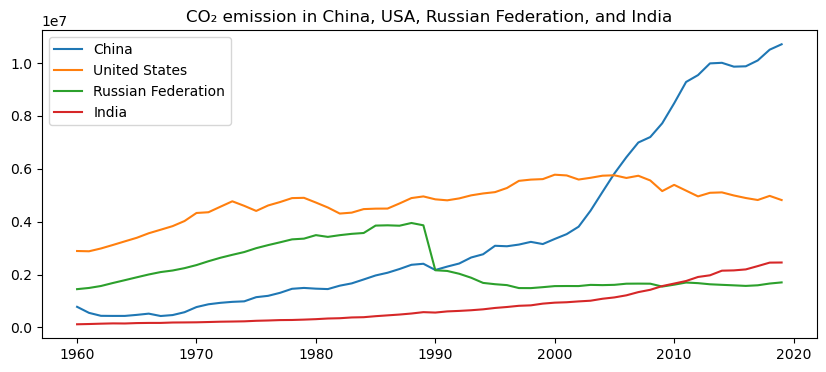

In [79]:
df_china = df_all_countries[df_all_countries['country_name'] == 'China']
df_usa = df_all_countries[df_all_countries['country_name'] == 'United States']
df_russia = df_all_countries[df_all_countries['country_name'] == 'Russian Federation']
df_india = df_all_countries[df_all_countries['country_name'] == 'India']

plt.figure(figsize=(10, 4))
plt.title('CO₂ emission in China, USA, Russian Federation, and India')
plt.plot(df_china['year'], df_china['value'])
plt.plot(df_usa['year'], df_usa['value'])
plt.plot(df_russia['year'], df_russia['value'])
plt.plot(df_india['year'], df_india['value'])
plt.legend(['China', 'United States', 'Russian Federation', 'India'])
plt.show()

Above graph proves that, China shows a steep growth in CO₂ emission after year 2000 and continues to grow at a same rate.

### CO₂ emission by geographic region

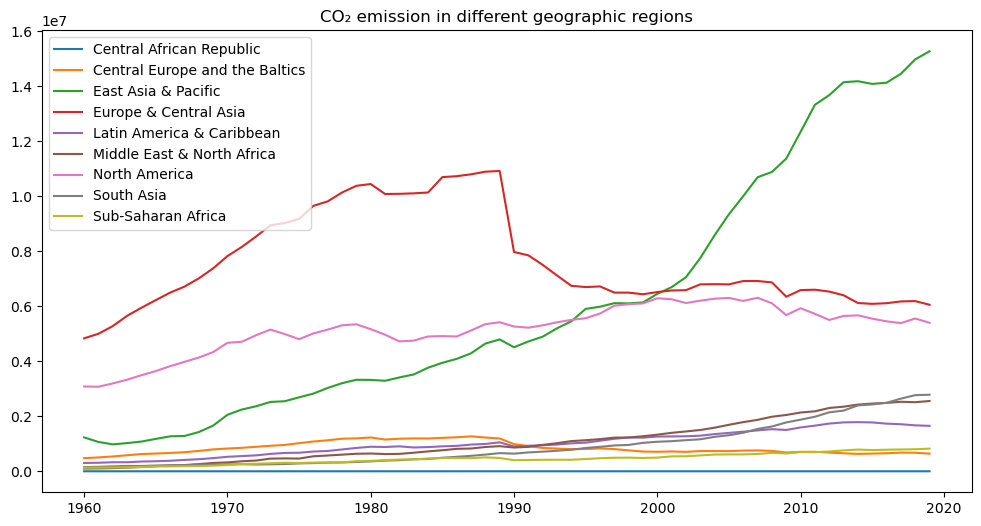

In [64]:
legend_names = []
plt.figure(figsize=(12, 6))
plt.title('CO₂ emission in different geographic regions')
for geo_group_name in df_geo_regions['country_name'].unique():
    geo_region = df_geo_regions[df_geo_regions['country_name'] == geo_group_name]
    x = geo_region['year']
    y = geo_region['value']
    plt.plot(x, y)
    legend_names.append(geo_group_name)
    
plt.legend(legend_names)
plt.show()

<div class="alert alert-info">
    <h3>Observations:</h3>
    <ul>
        <li>Main 3 contibutors to CO<sub>2</sub> emission are
            <ul>
                <li>East Asia &amp; Pasific</li>
                <li>Europe &amp; Central Asia</li>
                <li>North America</li>
            </ul>
        </li>
        <li>When we compaire above two graphs, we can clearly see that China is the main contributor in East Asia, as well as in entire world.</li>
        <li>Other regions has made a good progress in reducing/controlling carbon footprint over time.</li>
    </ul>
</div>

### CO₂ emission by economic groups

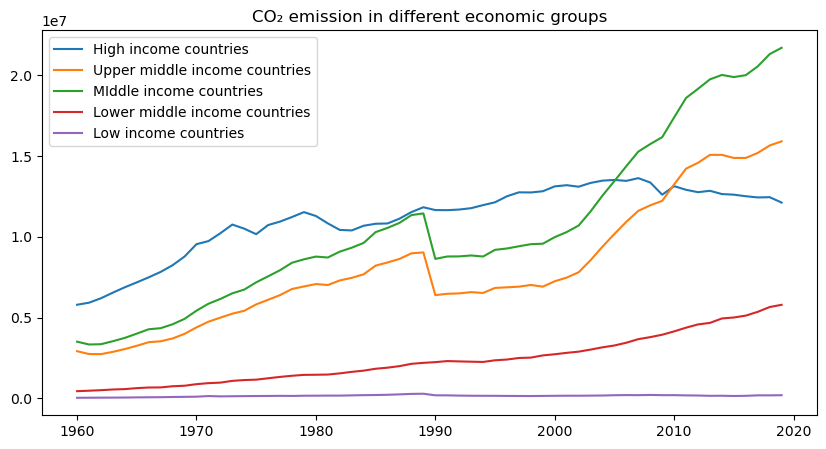

In [77]:
plt.figure(figsize=(10, 5))
plt.title('CO₂ emission in different economic groups')
plt.plot(df_high_incom['year'], df_high_incom['value'], label="High income countries")
plt.plot(df_upper_middle_income['year'], df_upper_middle_income['value'], label="Upper middle income countries")
plt.plot(df_middle_income['year'], df_middle_income['value'], label="MIddle income countries")
plt.plot(df_lower_middle_income['year'], df_lower_middle_income['value'], label="Lower middle income countries")
plt.plot(df_low_income['year'], df_low_income['value'], label="Low income countries")
plt.legend()
plt.show()

<div class="alert alert-info">
    <h3>Observations:</h3>
    <ul>
        <li>Main 3 contibutors to CO<sub>2</sub> emission are
            <ul>
                <li>Middle income countries</li>
                <li>Upper middle income countries</li>
                <li>High income countries</li>
            </ul>
        </li>
        <li>Middle and Upper middle income countries show similar pattern, but in different levels of emission.</li>
        <li>High income countries tend to reduce/maintain their emission level.</li>
        <li>In this graph we can clearly see how economic growth affects CO<sub>2</sub> emission.</li>
    </ul>
</div>

<h2>Summary</h2>
<ul>
    <li>Overall, majority of the countries in the world contribute to CO<sub>2</sub> emission in various levels according to their
        <ul>
            <li>Geopolitical region</li>
            <li>Econlomy</li>
            <li>and some other factors</li>
        </ul>
    </li>
    <li>Low income countries cintribute less amount compared to Middle income and High income countries.</li>
    <li>China is a key factor and major contributor in CO<sub>2</sub> emission according to above statistics. China maintain a stedy rate of increasing it's carbon footprint, while other developped countries trying to decrease their emission.</li>
    <li>
        <h4>Sudden drop of emission!</h4>
        What could be the reason for the sudden drop of emission <b>1989 and early 1990s</b> for Middle and Upper middle income countries?<br/>
        It could be,
        <ul>
            <li>Geopolitical changes
                <ul>
                    <li>In 1989: Fall of the Berlin wall and it's aftermath.</li>
                    <li>Early 1990s: Dissolution of the Soviet Union and economic restructuring in many Eastern European countries</li>
                </ul>
            </li>
            <li>Policy Changes
                <ul>
                    <li>In 1992: Earth Summit in Rio de Janeiro</li>
                </ul>
            </li>
            <li>Fluctuations in Energy Sources</li>
            <li>or some other reason</li>
        </ul>
    </li>
</ul>